In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from tqdm import tqdm
from time import time

# TODO: Move functions to separate modules
import functions as f

import core.background_model as background_model
import core.clique_finding as cf
import core.stats 

# GLOBALS

TTN_BIN = 4275
BIN_MAP_PATH = 'mappings/bin_map_human_100000.bed'
GTF_PATH = 'mappings/gencode.v38.annotation.gtf'
GENE_BIN_PATH = 'mappings/gene_bins.txt'
NON_GENE_BIN_PATH = 'mappings/non_gene_bins.txt'


gene_bins = []
with open('mappings/gene_bins.txt', 'r') as file:
    for line in file:
        gene_bins.append(line.strip())
gene_bins = [int(x) for x in gene_bins]


non_gene_bins = []
with open('mappings/non_gene_bins.txt', 'r') as file:
    for line in file:
        non_gene_bins.append(line.strip())
non_gene_bins = [int(x) for x in non_gene_bins]



In [ ]:
contact_matrix_zero = np.load('data/hic/wt_100kb_balanced_zeroed_no_chrY.npy')

In [9]:
contact_matrix_zero = f.generate_sample_matrix_bins(1000)

In [ ]:
TTN_BIN = 4275

In [42]:
import core.optimizer


best_alpha, best_k, best_clique, final_pval, trial_history = core.optimizer.optimize_diffusion_params(contact_matrix_zero, TTN_BIN, (5,100), (0.01, 0.95), n_trials=100, timeout_minutes=200)

[I 2025-05-24 18:00:55,657] A new study created in memory with name: no-name-bcf0f681-7e9e-4178-82af-bb7dc51b2b5b
[I 2025-05-24 18:00:56,654] Trial 0 finished with value: 0.439 and parameters: {'alpha': 0.2712361929297907, 'k': 99}. Best is trial 0 with value: 0.439.
[I 2025-05-24 18:00:57,357] Trial 1 finished with value: 0.261 and parameters: {'alpha': 0.5002551682601428, 'k': 79}. Best is trial 1 with value: 0.261.
[I 2025-05-24 18:00:57,701] Trial 2 finished with value: 0.138 and parameters: {'alpha': 0.7886214002385026, 'k': 45}. Best is trial 2 with value: 0.138.
[I 2025-05-24 18:00:58,164] Trial 3 finished with value: 0.231 and parameters: {'alpha': 0.26536117870587256, 'k': 59}. Best is trial 2 with value: 0.138.
[I 2025-05-24 18:00:58,667] Trial 4 finished with value: 0.15 and parameters: {'alpha': 0.6190062860149517, 'k': 60}. Best is trial 2 with value: 0.138.
[I 2025-05-24 18:00:59,053] Trial 5 finished with value: 0.19 and parameters: {'alpha': 0.22331106664777634, 'k': 47

In [43]:
best_alpha, best_k, best_clique, final_pval

(0.9275935189313633,
 30,
 array([30, 71, 32, 87, 61, 42, 47, 52, 80, 64, 89, 78, 72, 79, 45, 40, 44,
        10, 34,  8,  6, 85, 25,  7, 76, 59, 88, 31, 23, 74]),
 0.061)

In [44]:
pd.DataFrame(trial_history)

,alpha,k,pval,fold_change
0,0.927594,30,0.061,1.619959
1,0.754298,32,0.062,1.348620
2,0.769723,30,0.063,1.372506
3,0.804741,30,0.063,1.491135
4,0.603088,30,0.063,1.074835
...,...,...,...,...
95,0.851999,11,0.460,1.153142
96,0.885905,100,0.462,1.695388
97,0.091982,7,0.481,1.013135
98,0.606684,6,0.488,1.143855


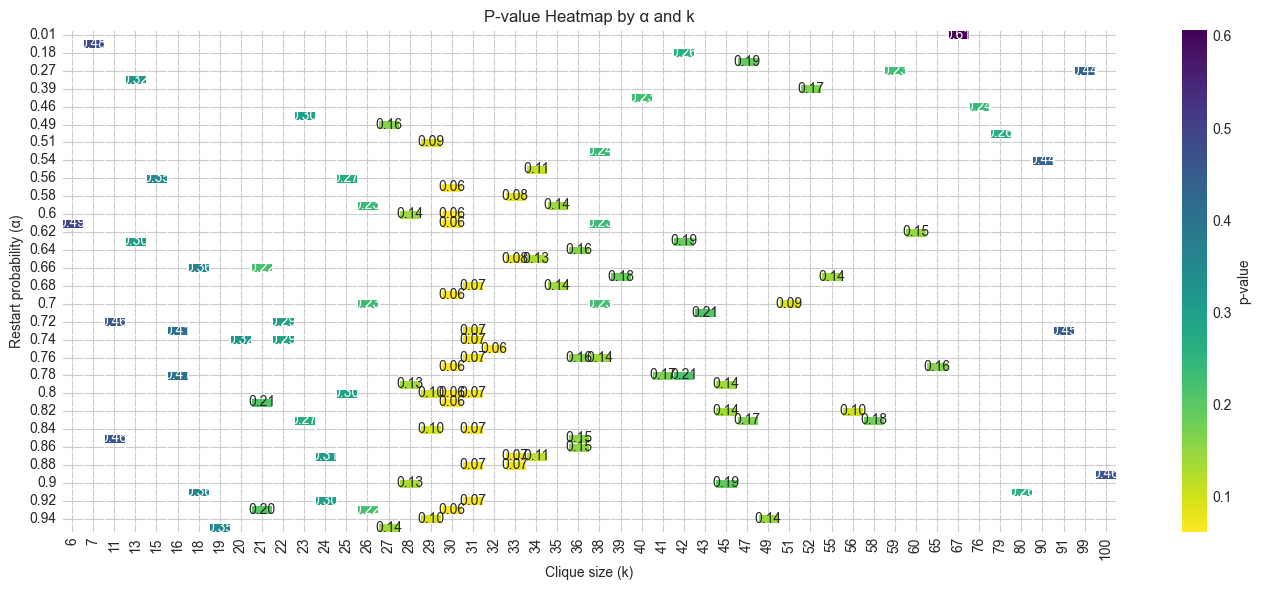

In [55]:
import core.visuals

core.visuals.plot_pval_heatmap_from_trials(pd.DataFrame(trial_history), alpha_precision=2)


In [56]:
import core.optimizer
import core.visuals


sizes, ttn_scores, p_values, fold_changes, bg_dists = core.optimizer.optimize_clique_size_diffusion(contact_matrix_zero, max_clique_size=100, seed_bin=TTN_BIN, alpha=best_alpha)

🔄 Computing full analytical diffusion matrix F…
✔︎ TTN seed clique (size 100) ready
✔︎ Built background cliques for all 1000 seeds


Processing sizes: 100%|██████████| 100/100 [00:31<00:00,  3.15it/s]

✅ Done optimize_clique_size_analytical


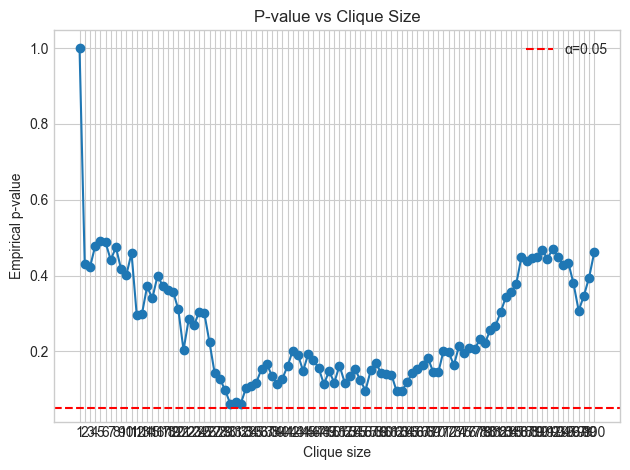

Optimal clique size = 30, p-value = 0.0619


In [57]:
core.visuals.plot_clique_size_optimization(sizes, p_values)